In [33]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd 
from sklearn.datasets import load_boston
import seaborn as ss
%matplotlib inline   
#^ % ^chart's will show up,when exports notebook
#mp.rcParams["patch.force_edgecolor"]=True >> when use distplot to get edge color

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr



In [3]:
boston = load_boston()
type(boston) 

sklearn.utils.Bunch

In [4]:
print(dir(boston))

boston.data[0].shape

['DESCR', 'data', 'feature_names', 'filename', 'target']


(13,)

# link add 
##  []>> for sentence to use () >> link 

In [5]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data.shape  

(506, 13)

In [6]:
data['price']=boston.target

# price add cilo nah, er jono new column nite hoilo. now it 
# has 14 columns
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 # missing data checking
 

In [9]:
pd.isnull(data).any() # pandas module 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
price      False
dtype: bool

In [10]:
data.info() # dataframe checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# histogram

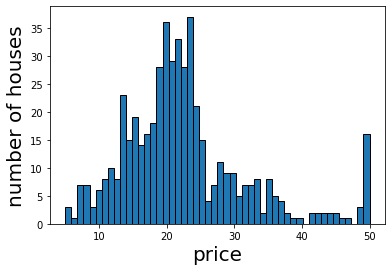

In [11]:
mp.hist(x=data['price'],bins=50,ec='black')
mp.xlabel('price', fontsize=20)
mp.ylabel('number of houses', fontsize=20)
mp.show()

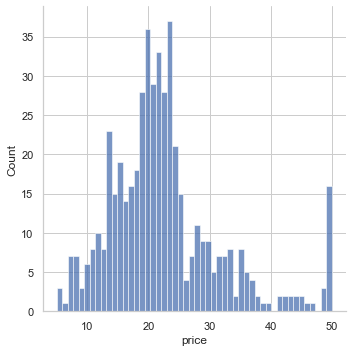

In [31]:
ss.displot(data['price'],bins=50)
# dict >> dictionary fuction er use --- 
mp.show()

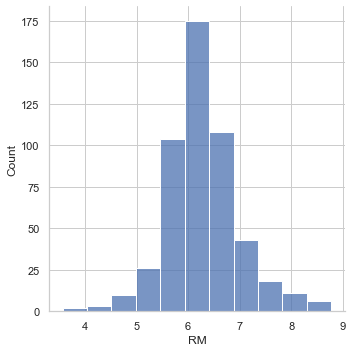

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [32]:
ss.displot(data['RM'],kde=False,bins=11 )
mp.show()
data["RM"].mean()

print(data['RAD'].value_counts())
#print(boston.DESCR)
#dataframe's unique value on value_counts()

# bar chart uses, bins 

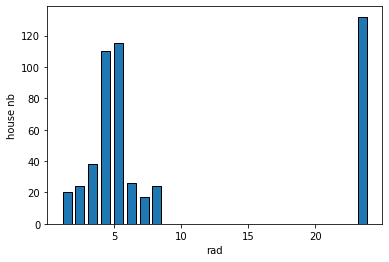

In [14]:
mp.hist(data['RAD'],bins=24,ec='black',rwidth=0.7)
mp.xlabel('rad')
mp.ylabel('house nb')
rad=data['RAD'].value_counts()
mp.show()
# rwidth uses as >>bar chart

<BarContainer object of 9 artists>

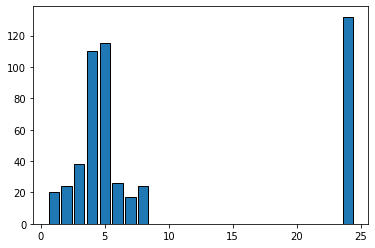

In [15]:
mp.bar(rad.axes[0],rad)

In [16]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# correlation
 
$$ \rho_{xy}=corr(x,y)$$
$ -1 \leq\rho_{xy}\leq +1 $

In [17]:
data.corr()
# correlation of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# ei point e aisha haraiya jai , point ta critical mone hoy 

In [18]:
zero=np.zeros_like(data.corr())
ind=np.triu_indices_from(zero)
zero[ind]=True
zero

## 

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

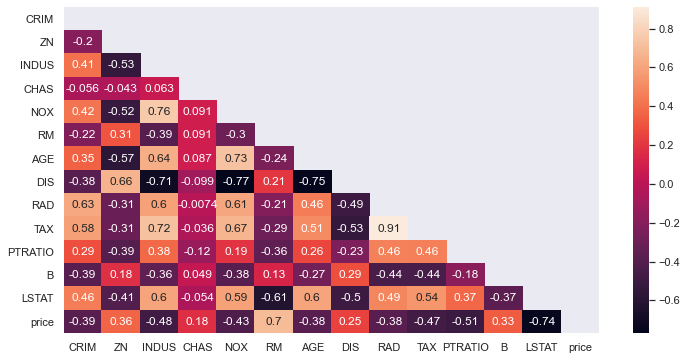

In [19]:
mp.figure(figsize=[12,6])
ss.set()
ss.heatmap(data.corr(),mask=zero, annot=True)
mp.show()

C:\Users\xraya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


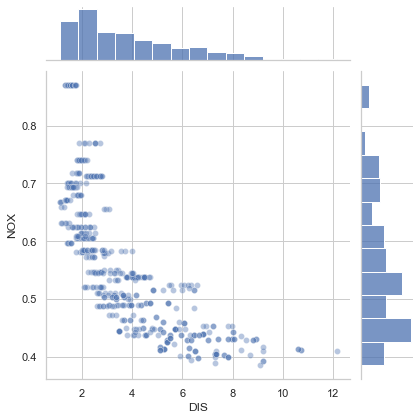

In [20]:
ss.set_style('whitegrid')
ss.jointplot(data['DIS'], data['NOX'],joint_kws=dict(alpha=0.4))
mp.show()

C:\Users\xraya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


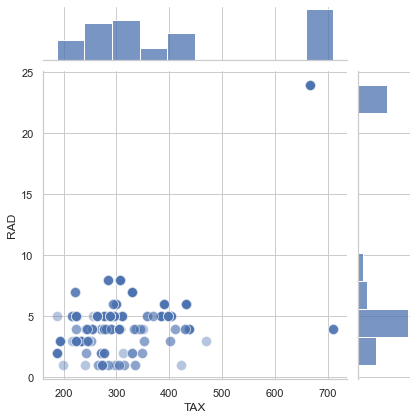

In [21]:
ss.set_style('whitegrid')
ss.jointplot(data['TAX'],data['RAD'],joint_kws=dict(alpha=0.4),s=100)
mp.show()

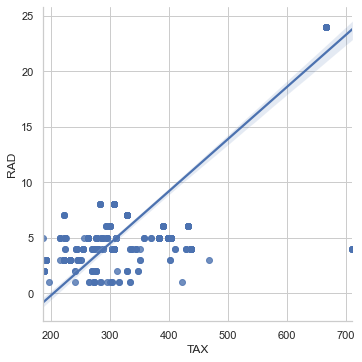

In [22]:
ss.lmplot(x='TAX', y='RAD',data=data)
mp.show()

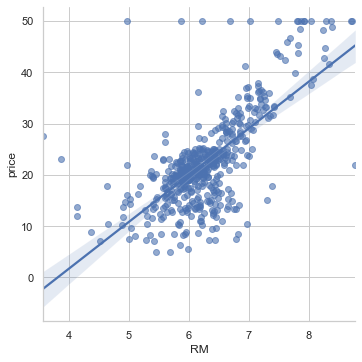

Wall time: 431 ms


In [23]:
%%time
ss.lmplot(x='RM',y='price',data=data,scatter_kws=dict(alpha=0.6))
mp.show()


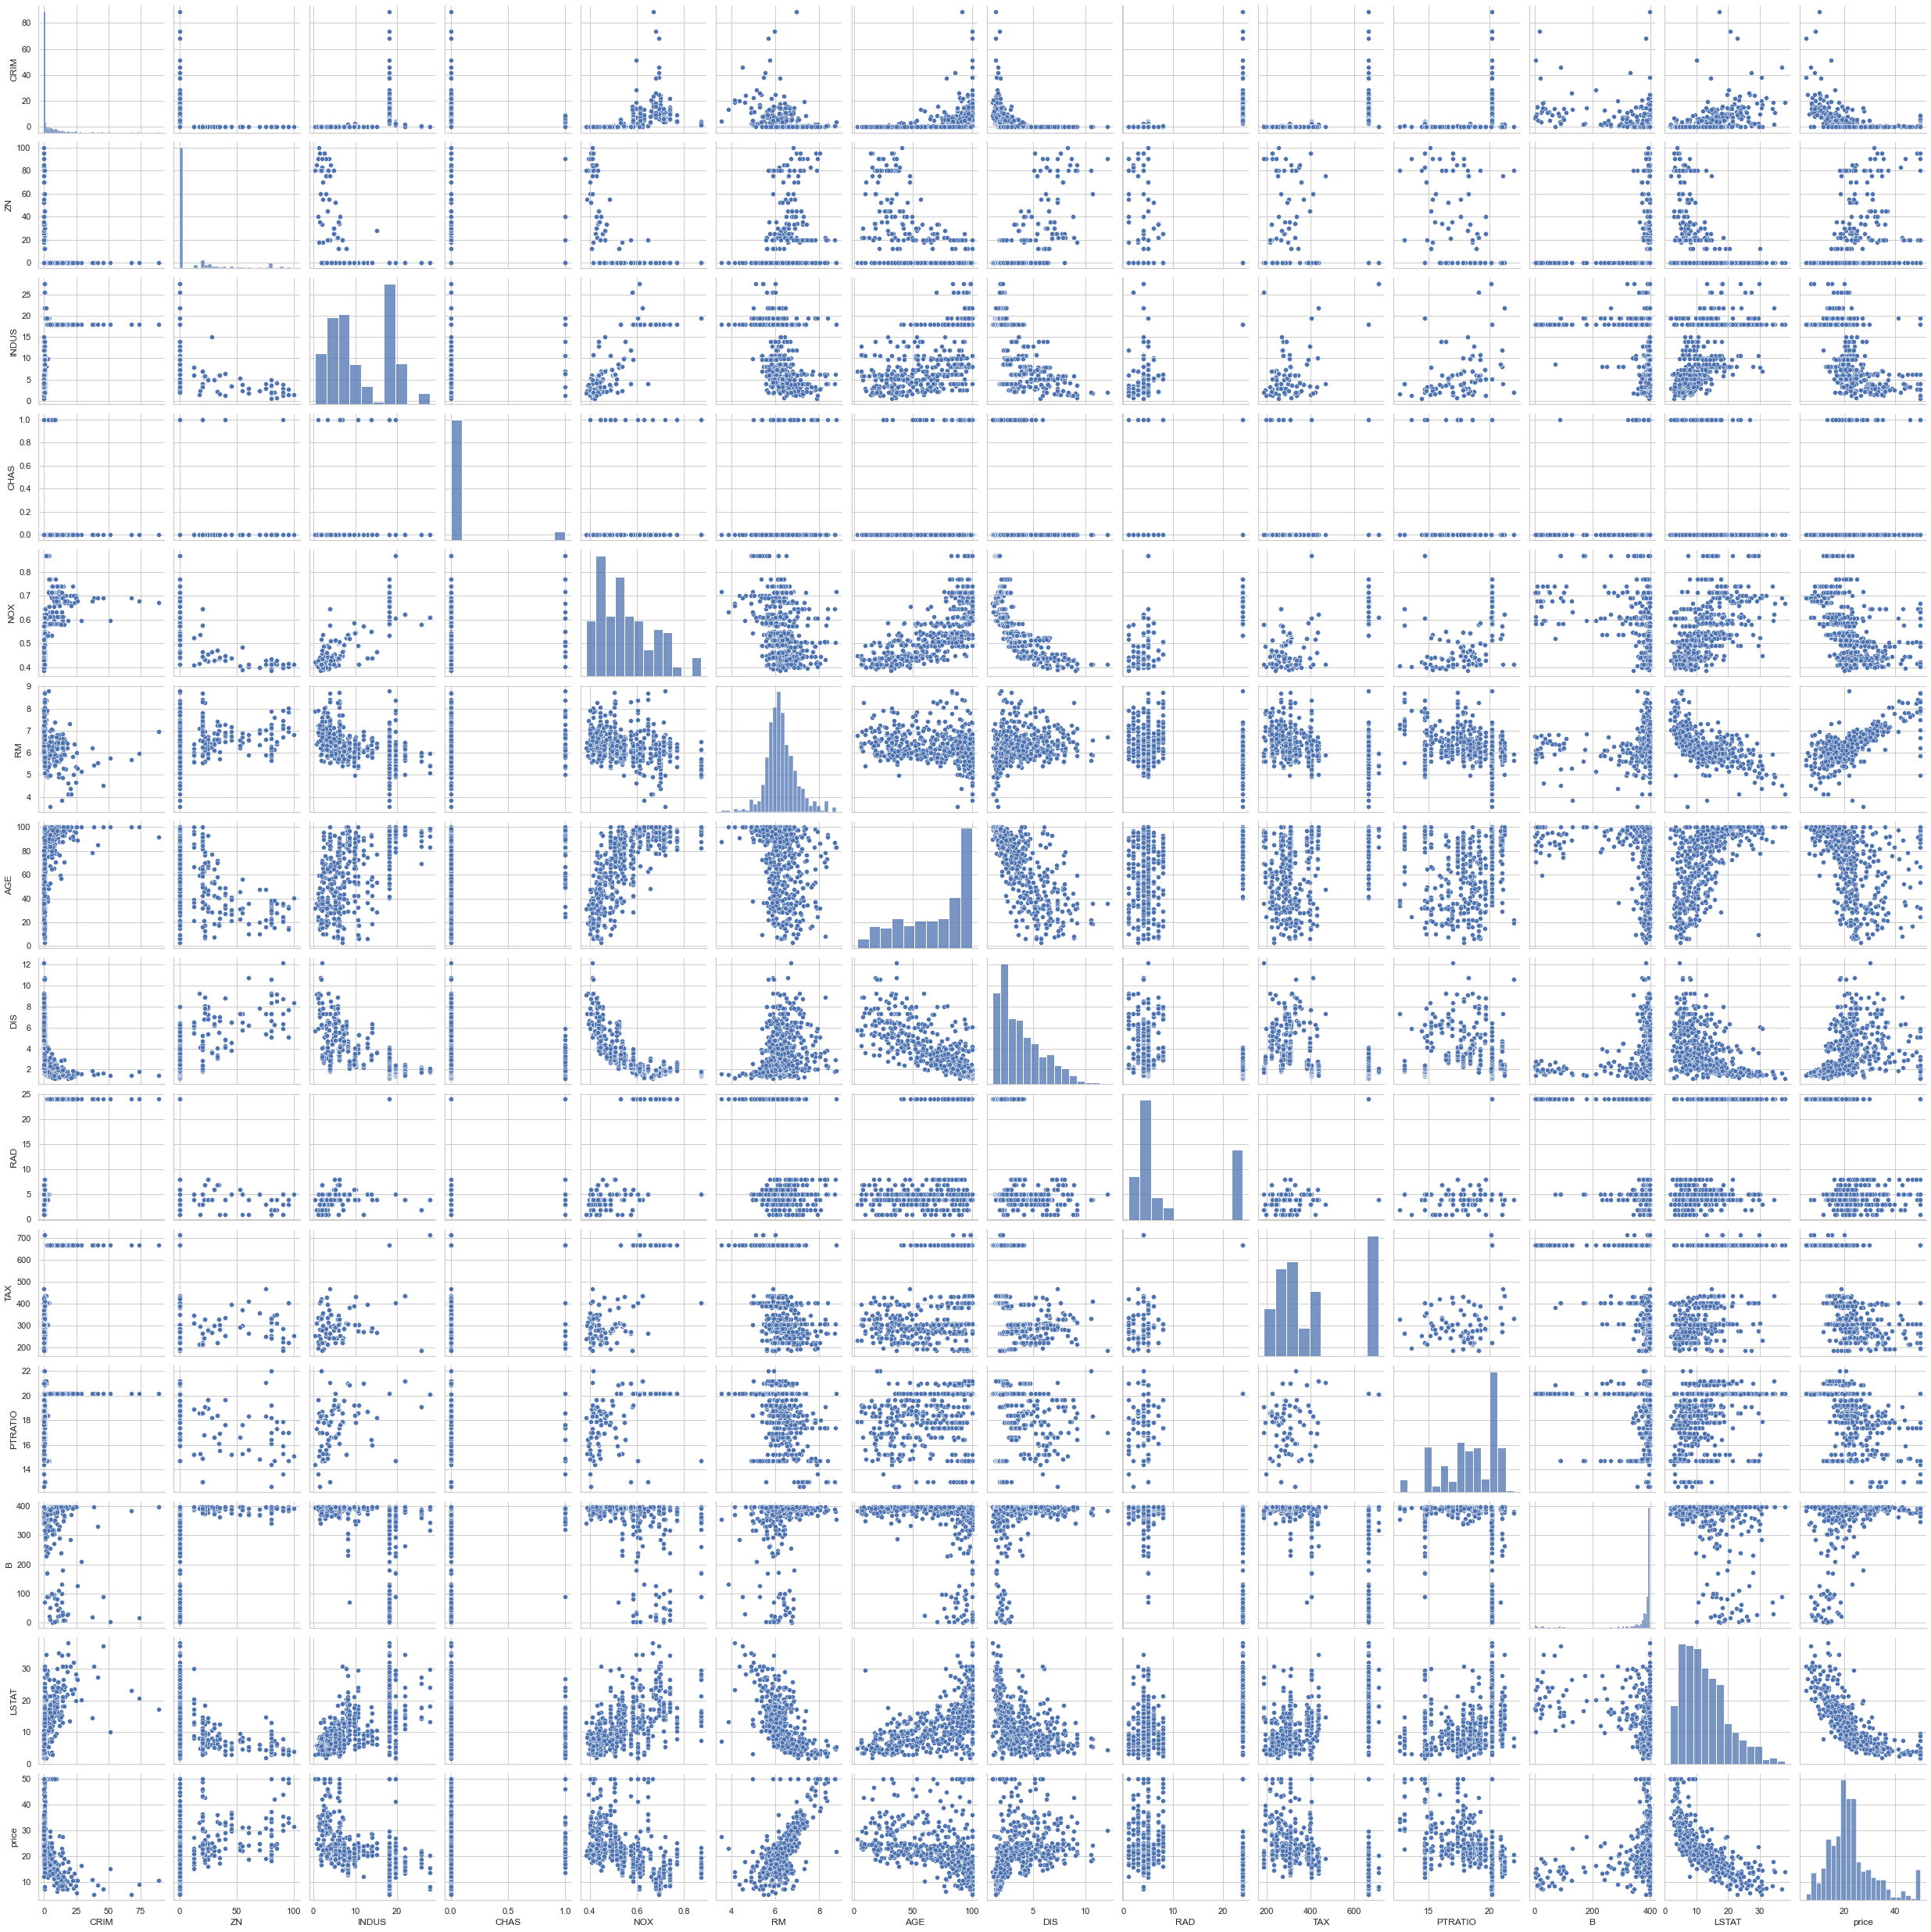

Wall time: 26.6 s


In [24]:
%%time
ss.pairplot(data)
mp.show()

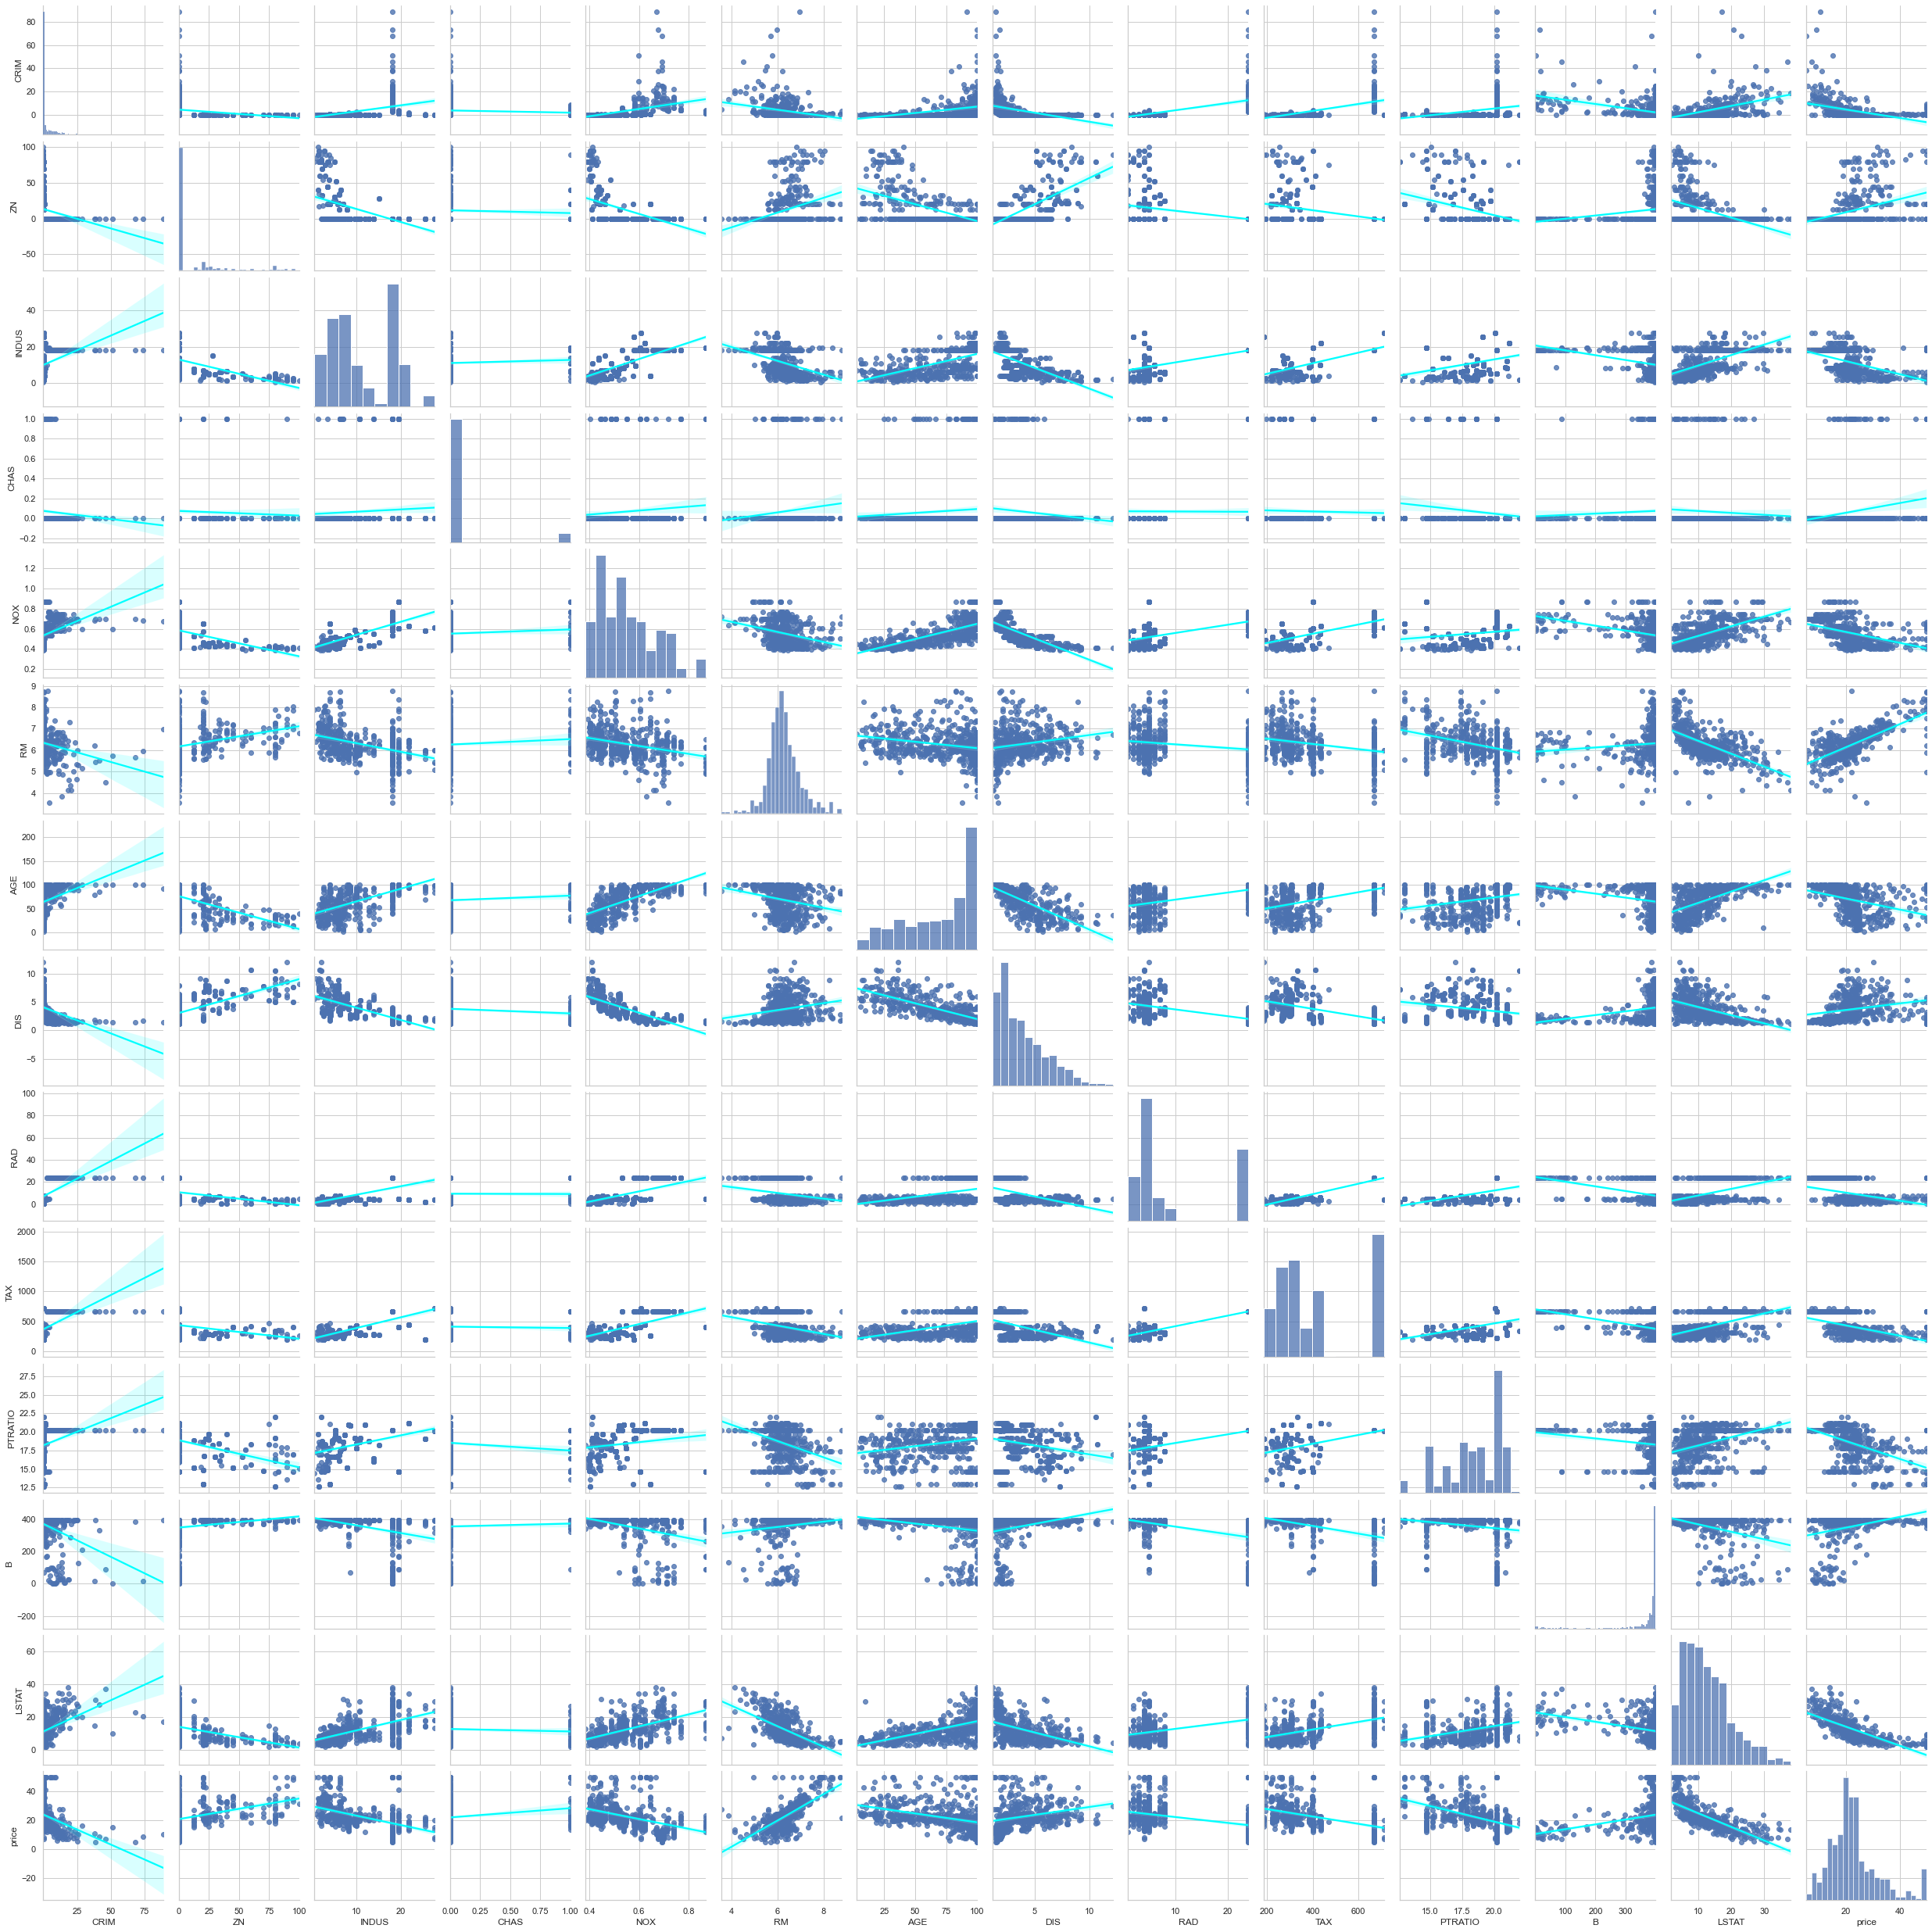

Wall time: 54.6 s


In [25]:
%%time
ss.pairplot(data, kind='reg',plot_kws=dict(line_kws=dict(color='cyan')))
mp.show()

In [34]:
price=data['price']
new_data = data.drop('price', axis=1)

In [35]:
xtrain, xtest, ytrain, ytest= tts(new_data,price,test_size=0.2,random_state=10)

In [37]:
reg = lr()
reg.fit(xtrain,ytrain)

LinearRegression()

In [45]:
reg.intercept_


36.53305138282439

In [44]:
pd.DataFrame(reg.coef_ ,index=xtrain.columns,columns=['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [46]:
reg.score(xtrain,ytrain)

0.750121534530608

In [47]:
reg.score(xtest,ytest)

0.6709339839115628